### 주택 특성을 이용한 주택 가격 예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 1. 데이터 로드

In [4]:
df = pd.read_csv('./data/india_housing_prices.csv')
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


##### 2. 데이터 구조 및 기초 통계 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [6]:
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [7]:
# 컬럼명 확인
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

##### 3. 데이터 전처리

In [8]:
# null값 확인
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [9]:
# Price_per_SqFt = 0 인값 존재
# Floor_No = 0 인 값 존재

df[['Price_per_SqFt','Year_Built','Floor_No']].describe()

,Price_per_SqFt,Year_Built,Floor_No
count,250000.000000,250000.000000,250000.000000
mean,0.130597,2006.520012,14.966800
std,0.130747,9.808575,8.948047
min,0.000000,1990.000000,0.000000
25%,0.050000,1998.000000,7.000000
50%,0.090000,2007.000000,15.000000
75%,0.160000,2015.000000,23.000000
max,0.990000,2023.000000,30.000000


In [10]:
# 논리적 오류?

df_invalid = df[df['Floor_No'] > df['Total_Floors']]
print(df_invalid[['Floor_No', 'Total_Floors']])



        Floor_No  Total_Floors
0             22             1
1             21            20
4              3             2
5             27             1
6             16             5
...          ...           ...
249989        26            10
249990        21            13
249992        20            15
249995        19             7
249998        14            11

[116304 rows x 2 columns]


In [11]:
# 주별/도시별 평균 집값 구하기
state_avg = df.groupby("State")["Price_in_Lakhs"].mean()
print(state_avg)

city_avg = df.groupby("City")["Price_in_Lakhs"].mean()
print(city_avg)




State
Andhra Pradesh    255.197870
Assam             252.779235
Bihar             254.919040
Chhattisgarh      252.676337
Delhi             252.529900
Gujarat           255.790061
Haryana           254.445784
Jharkhand         253.610145
Karnataka         257.408465
Kerala            254.367332
Madhya Pradesh    255.961459
Maharashtra       254.706280
Odisha            252.838743
Punjab            252.796877
Rajasthan         254.600214
Tamil Nadu        256.663684
Telangana         255.535173
Uttar Pradesh     256.249920
Uttarakhand       254.677234
West Bengal       254.008640
Name: Price_in_Lakhs, dtype: float64
City
Ahmedabad         253.586827
Amritsar          252.429802
Bangalore         258.456639
Bhopal            256.498896
Bhubaneswar       254.902173
Bilaspur          251.879267
Chennai           256.830172
Coimbatore        256.504745
Cuttack           250.786672
Dehradun          256.890115
Durgapur          254.100152
Dwarka            253.454299
Faridabad         254.86

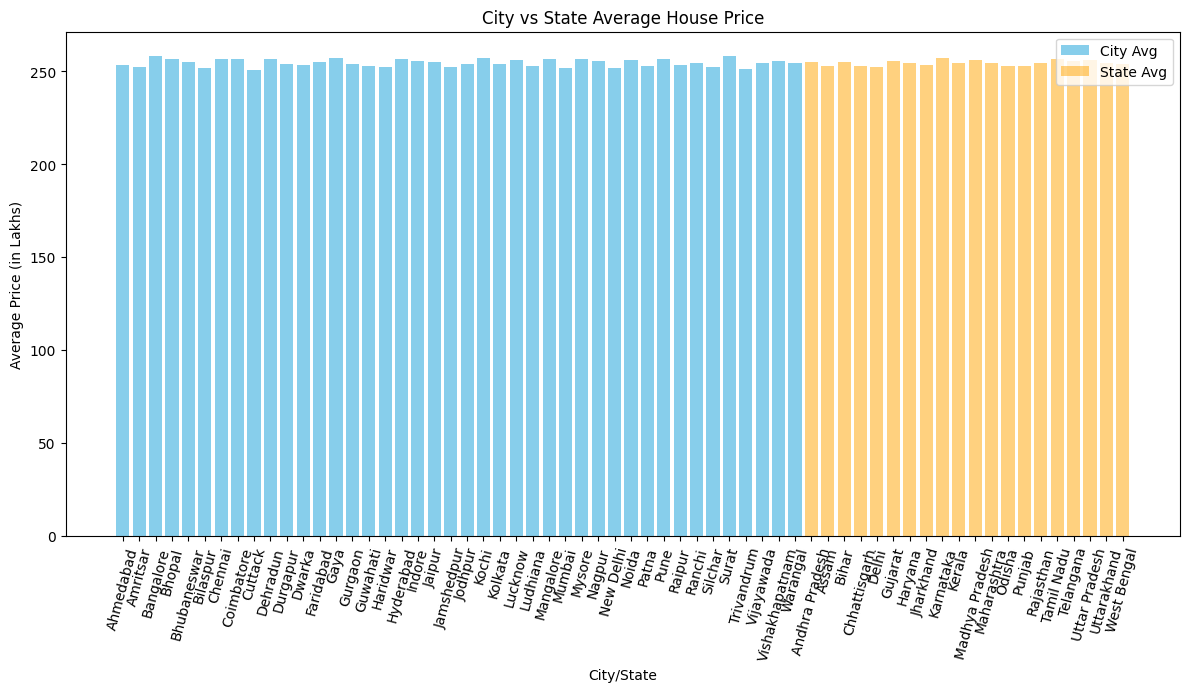

In [12]:
## 도시/주 별 평균 집값 시각화

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 도시별 평균 집값 스택형 막대 그래프
plt.bar(city_avg.index, city_avg, label='City Avg', color='skyblue')

# 주별 평균 집값 스택형 막대 그래프 (덧붙여서 표시)
plt.bar(state_avg.index, state_avg, label='State Avg', color='orange', alpha=0.5)

# 제목과 축 레이블 설정
plt.title("City vs State Average House Price")
plt.xlabel("City/State")
plt.ylabel("Average Price (in Lakhs)")

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()

# x축 도시/주 명 안겹치게
plt.xticks(rotation=75)

# 그래프 표시
plt.show()


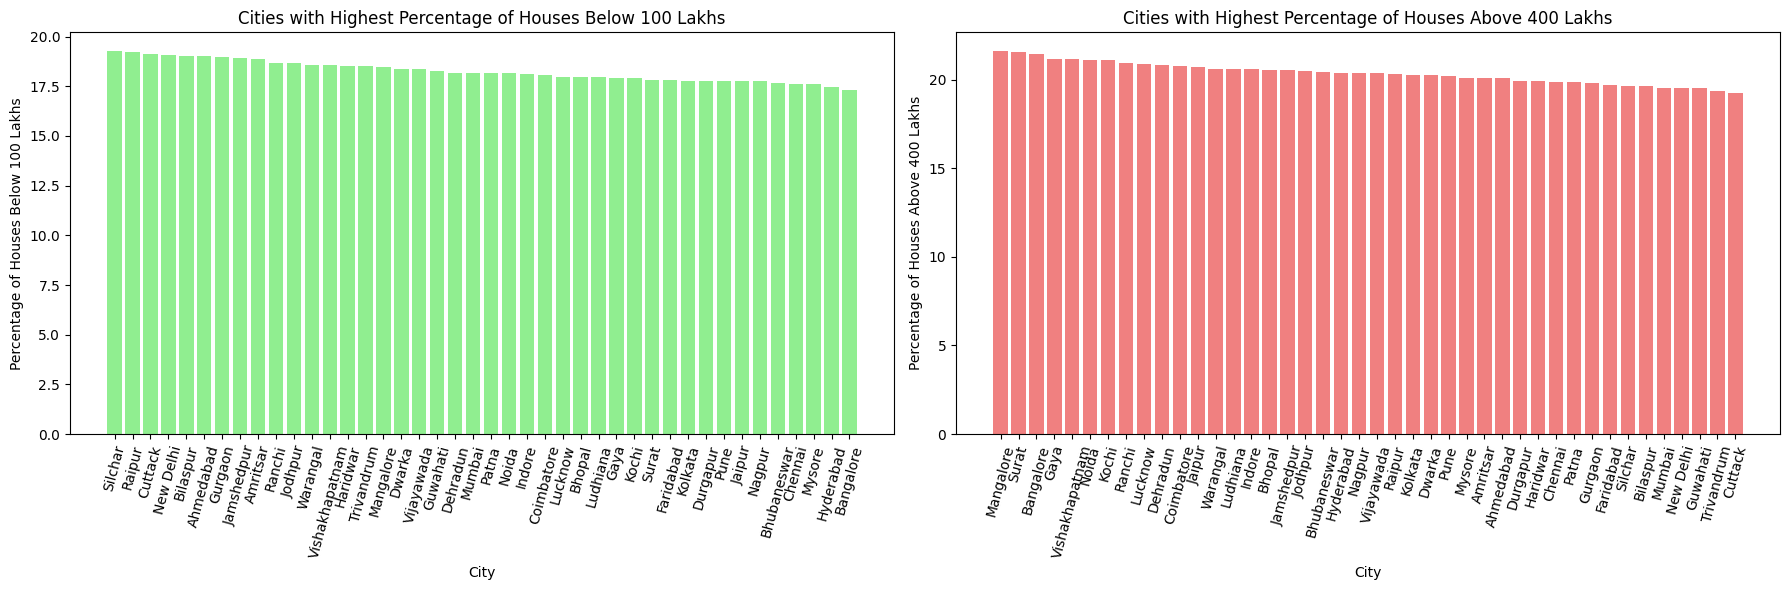

In [5]:
## 100이하 주택 비율이 높은 도시와 400이상 주택 비율이 낮은 도시 비교

# 집값이 100 이하인 데이터를 필터링하고 비율 계산
low_price_df = df[df["Price_in_Lakhs"] <= 100]
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

# 100 이하 주택 비율을 기준으로 하위 5개 도시 선택
top_5_cities_with_low_price_ratio = city_low_price_ratio.sort_values(ascending=False)

# 집값이 400 이상인 데이터를 필터링하고 비율 계산
high_price_df = df[df["Price_in_Lakhs"] >= 400]
city_high_price_count = high_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100

# 400 이상 주택 비율
top_5_cities_with_high_price_ratio = city_high_price_ratio.sort_values(ascending=False)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 100 이하 주택 비율
axes[0].bar(top_5_cities_with_low_price_ratio.index, top_5_cities_with_low_price_ratio.values, color='lightgreen')
axes[0].set_title("Cities with Highest Percentage of Houses Below 100 Lakhs")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses Below 100 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 400 이상 주택 비율
axes[1].bar(top_5_cities_with_high_price_ratio.index, top_5_cities_with_high_price_ratio.values, color='lightcoral')
axes[1].set_title("Cities with Highest Percentage of Houses Above 400 Lakhs")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses Above 400 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

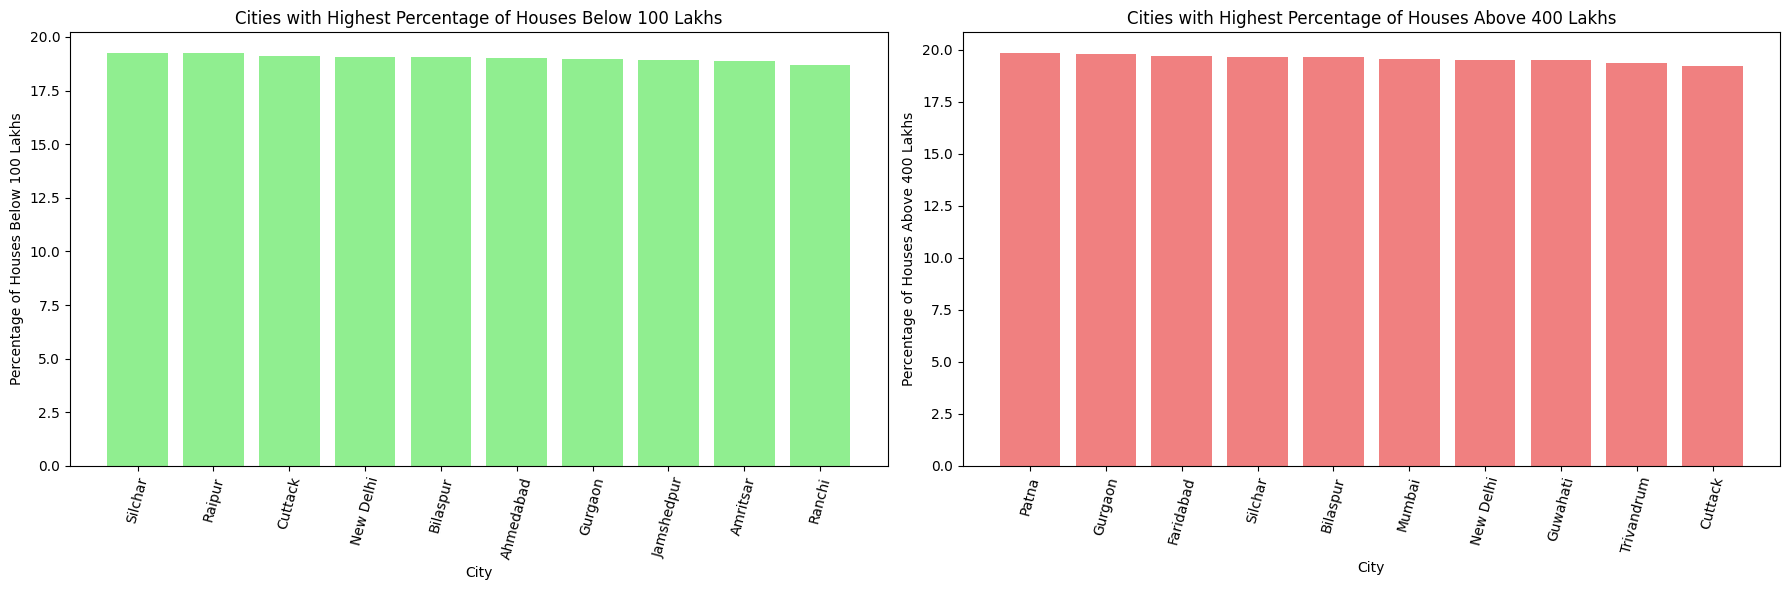

In [13]:
## 100이하 주택 비율이 높은 도시와 400이상 주택 비율이 낮은 도시를 비교 -> 10개 도시 중 5개의 도시가 일치함

# 집값이 100 이하인 데이터를 필터링하고 비율 계산
low_price_df = df[df["Price_in_Lakhs"] <= 100]
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

# 100 이하 주택 비율을 기준으로 하위 5개 도시 선택
top_5_cities_with_low_price_ratio = city_low_price_ratio.sort_values(ascending=False).head(10)

# 집값이 400 이상인 데이터를 필터링하고 비율 계산
high_price_df = df[df["Price_in_Lakhs"] >= 400]
city_high_price_count = high_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100

# 400 이상 주택 비율
top_5_cities_with_high_price_ratio = city_high_price_ratio.sort_values(ascending=False).tail(10)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 100 이하 주택 비율
axes[0].bar(top_5_cities_with_low_price_ratio.index, top_5_cities_with_low_price_ratio.values, color='lightgreen')
axes[0].set_title("Cities with Highest Percentage of Houses Below 100 Lakhs")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses Below 100 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 400 이상 주택 비율
axes[1].bar(top_5_cities_with_high_price_ratio.index, top_5_cities_with_high_price_ratio.values, color='lightcoral')
axes[1].set_title("Cities with Highest Percentage of Houses Above 400 Lakhs")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses Above 400 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()


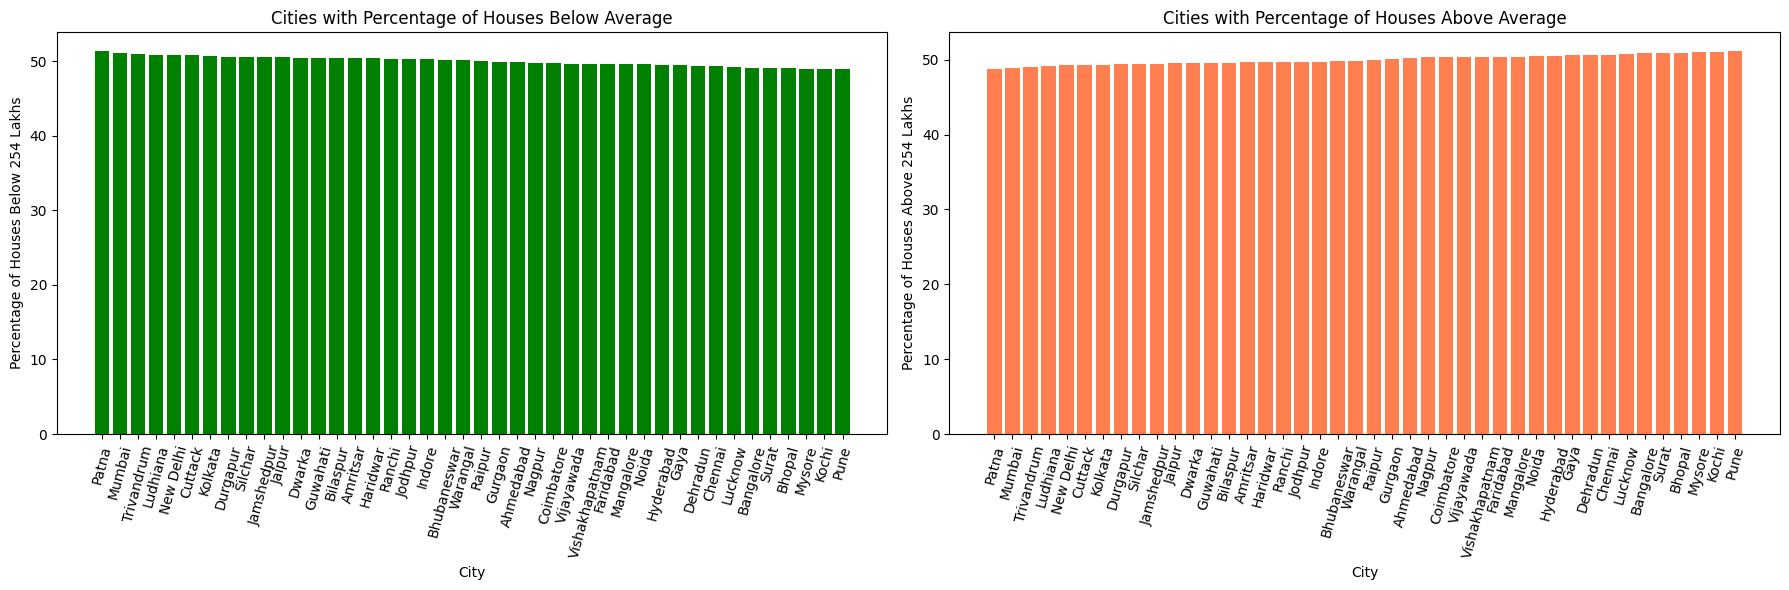

In [14]:
## 평균값을 기준으로 도시별 집값 나누어 비율 계산해보기 -> 254미만의 비율이 높은 도시와 254이상 비율이 낮은 도시가 순서가 같음

# 집값이 254 미만인 데이터를 필터링하고 비율 계산
low_price_df = df[df["Price_in_Lakhs"] < 254]
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

# 254 미만 주택 비율을 기준으로 하위 5개 도시 선택
top_5_cities_with_low_price_ratio = city_low_price_ratio.sort_values(ascending=False)

# 집값이 254 이상인 데이터를 필터링하고 비율 계산
high_price_df = df[df["Price_in_Lakhs"] >= 254]
city_high_price_count = high_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100
top_5_cities_with_high_price_ratio = city_high_price_ratio.sort_values(ascending=True)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 254 미만 주택 비율
axes[0].bar(top_5_cities_with_low_price_ratio.index, top_5_cities_with_low_price_ratio.values, color='green')
axes[0].set_title("Cities with Percentage of Houses Below Average")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses Below 254 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 254 이상 주택 비율
axes[1].bar(top_5_cities_with_high_price_ratio.index, top_5_cities_with_high_price_ratio.values, color='coral')
axes[1].set_title("Cities with Percentage of Houses Above Average")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses Above 254 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()


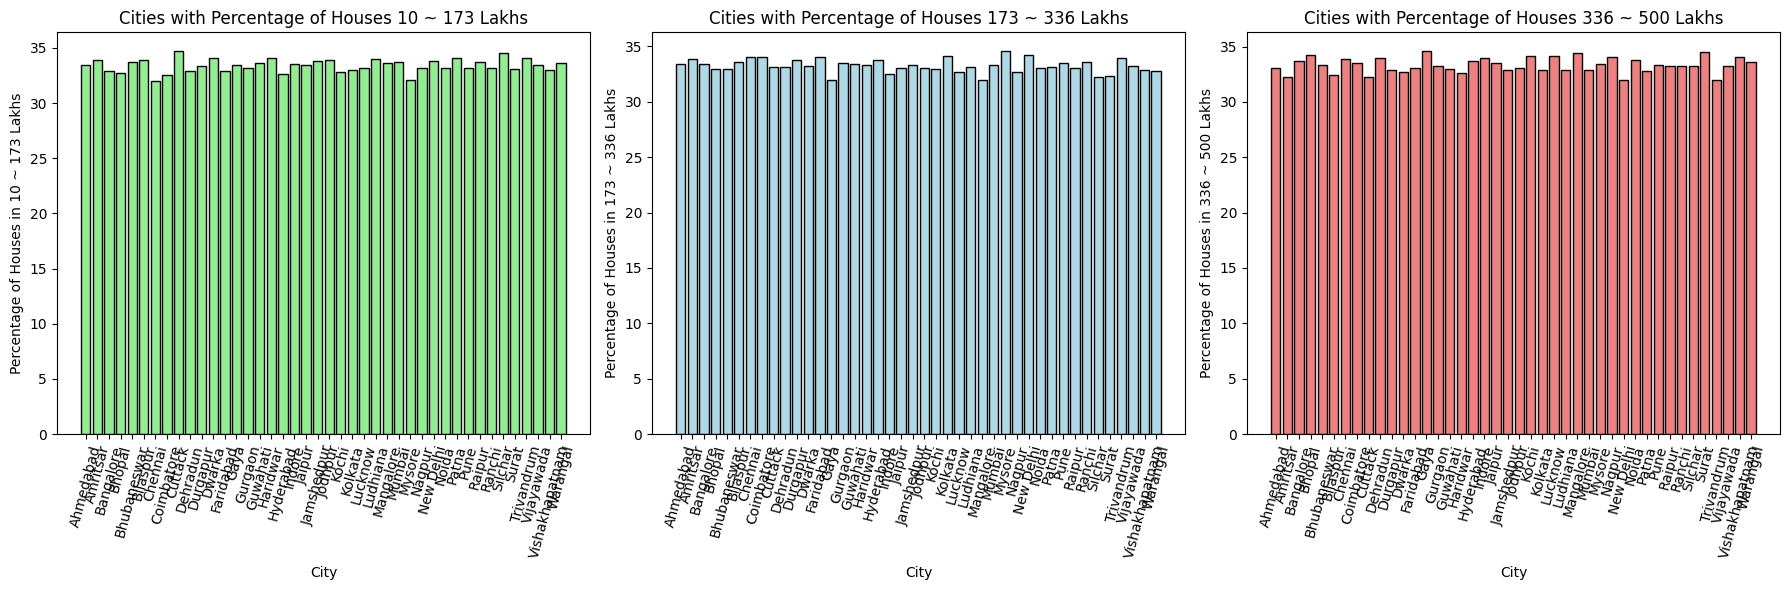

In [15]:
## 최소값과 최대값을 기준으로 3구간으로 나눈 도시별 가격

# 최소값과 최대값 설정
min_value = 10
max_value = 500

# 3개의 구간으로 나누기 (등간격 구간)
interval_1 = 173  # 첫 번째 구간의 끝
interval_2 = 336  # 두 번째 구간의 끝

# 구간을 기준으로 데이터를 나누기
low_price_df = df[(df["Price_in_Lakhs"] >= min_value) & (df["Price_in_Lakhs"] < interval_1)]
mid_price_df = df[(df["Price_in_Lakhs"] >= interval_1) & (df["Price_in_Lakhs"] < interval_2)]
high_price_df = df[(df["Price_in_Lakhs"] >= interval_2) & (df["Price_in_Lakhs"] <= max_value)]

# 각 구간별로 도시별 비율 계산
city_low_price_count = low_price_df.groupby("City").size()
city_total_count = df.groupby("City").size()
city_low_price_ratio = city_low_price_count / city_total_count * 100

city_mid_price_count = mid_price_df.groupby("City").size()
city_mid_price_ratio = city_mid_price_count / city_total_count * 100

city_high_price_count = high_price_df.groupby("City").size()
city_high_price_ratio = city_high_price_count / city_total_count * 100

low_price_df = low_price_df.sort_values(by="Price_in_Lakhs", ascending=False)
mid_price_df = mid_price_df.sort_values(by="Price_in_Lakhs", ascending=False)
high_price_df = high_price_df.sort_values(by="Price_in_Lakhs", ascending=False)

# 그래프 출력
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 첫 번째 그래프: 10 ~ 173 구간
axes[0].bar(city_low_price_ratio.index, city_low_price_ratio.values, color='lightgreen', edgecolor='black')
axes[0].set_title("Cities with Percentage of Houses 10 ~ 173 Lakhs")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Percentage of Houses in 10 ~ 173 Lakhs")
axes[0].tick_params(axis='x', rotation=75)

# 두 번째 그래프: 173 ~ 336 구간
axes[1].bar(city_mid_price_ratio.index, city_mid_price_ratio.values, color='lightblue', edgecolor='black')
axes[1].set_title("Cities with Percentage of Houses 173 ~ 336 Lakhs")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Percentage of Houses in 173 ~ 336 Lakhs")
axes[1].tick_params(axis='x', rotation=75)

# 세 번째 그래프: 336 ~ 500 구간
axes[2].bar(city_high_price_ratio.index, city_high_price_ratio.values, color='lightcoral', edgecolor='black')
axes[2].set_title("Cities with Percentage of Houses 336 ~ 500 Lakhs")
axes[2].set_xlabel("City")
axes[2].set_ylabel("Percentage of Houses in 336 ~ 500 Lakhs")
axes[2].tick_params(axis='x', rotation=75)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_4684\3686061275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Range', y='Price_in_Lakhs', data=df, palette='Set2', ax=axes[0])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_4684\3686061275.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Price_Range'] == '10-173 Lakhs']["Price_in_Lakhs"], shade=True, color="lightgreen", label="10-173 Lakhs", ax=axes[1])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_4684\3686061275.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Price_Range'] == '173-336 Lakhs']["Pri

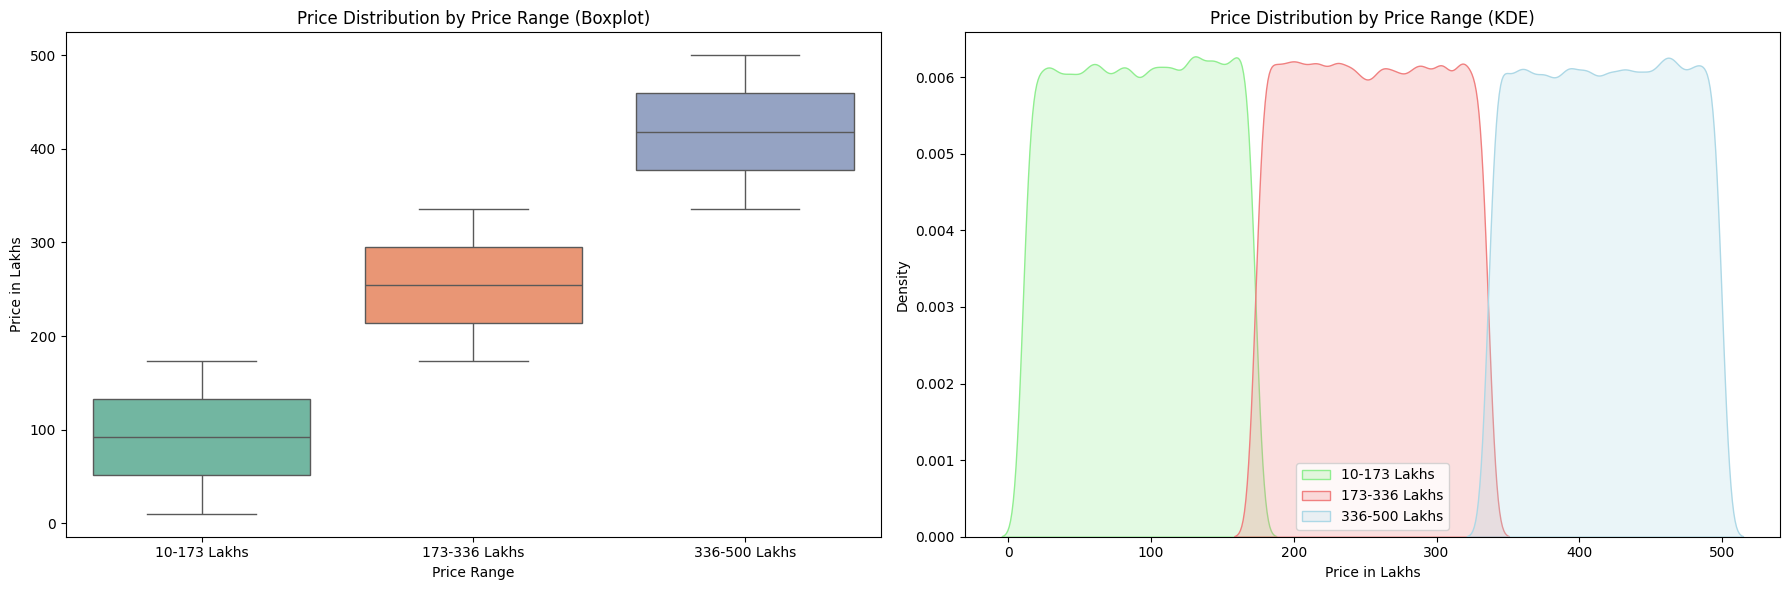

In [16]:
# 가격대 구간을 하나의 변수로 합치기
df['Price_Range'] = pd.cut(df['Price_in_Lakhs'], bins=[10, 173, 336, 500], labels=['10-173 Lakhs', '173-336 Lakhs', '336-500 Lakhs'])

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 박스플롯 (가격 분포)
sns.boxplot(x='Price_Range', y='Price_in_Lakhs', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Price Distribution by Price Range (Boxplot)')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Price in Lakhs')

# 커널 밀도 추정 (가격 분포)
sns.kdeplot(data=df[df['Price_Range'] == '10-173 Lakhs']["Price_in_Lakhs"], shade=True, color="lightgreen", label="10-173 Lakhs", ax=axes[1])
sns.kdeplot(data=df[df['Price_Range'] == '173-336 Lakhs']["Price_in_Lakhs"], shade=True, color="lightcoral", label="173-336 Lakhs", ax=axes[1])
sns.kdeplot(data=df[df['Price_Range'] == '336-500 Lakhs']["Price_in_Lakhs"], shade=True, color="lightblue", label="336-500 Lakhs", ax=axes[1])

axes[1].set_title('Price Distribution by Price Range (KDE)')
axes[1].set_xlabel('Price in Lakhs')
axes[1].set_ylabel('Density')
axes[1].legend()

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


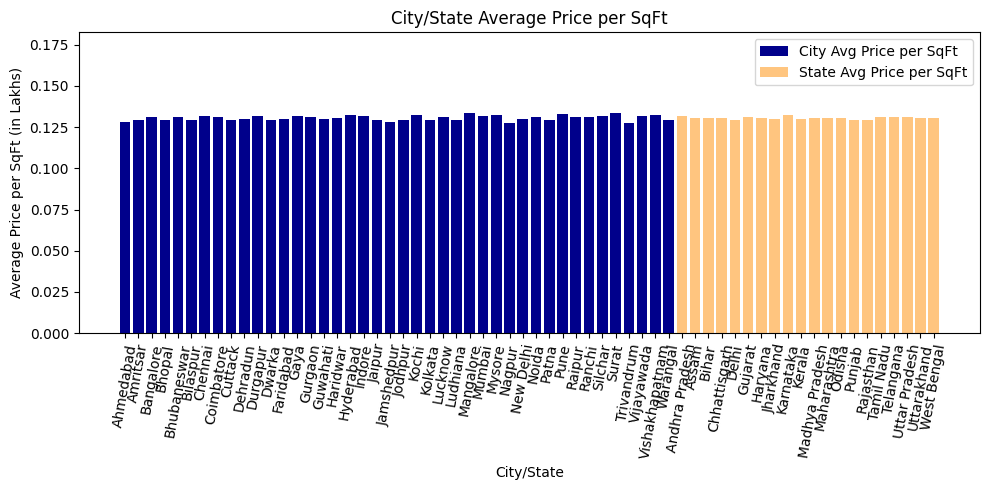

In [17]:
# 도시별 평당 가격 계산
city_avg_price_per_sqft = df.groupby('City')['Price_per_SqFt'].mean()

# 주별 평당 가격 계산
state_avg_price_per_sqft = df.groupby('State')['Price_per_SqFt'].mean()

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 도시별 평균 평당 가격 스택형 막대 그래프
plt.bar(city_avg_price_per_sqft.index, city_avg_price_per_sqft, label='City Avg Price per SqFt', color='darkblue')

# 주별 평균 평당 가격 스택형 막대 그래프 (덧붙여서 표시)
plt.bar(state_avg_price_per_sqft.index, state_avg_price_per_sqft, label='State Avg Price per SqFt', color='darkorange', alpha=0.5)

# 그래프 제목과 축 레이블 설정
plt.title("City/State Average Price per SqFt")
plt.xlabel("City/State")
plt.ylabel("Average Price per SqFt (in Lakhs)")

# y축 범위 조정 (필요시 삭제 가능)
plt.ylim(0, max(city_avg_price_per_sqft.max(), state_avg_price_per_sqft.max()+0.05))

# 범례 추가
plt.legend()

# x축 레이블 회전 및 레이아웃 조정
plt.xticks(rotation=80)
plt.tight_layout()

# 그래프 표시
plt.show()
